In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
sns.set()

def plotprocess():
    res['logPV'] = res['P.Value'].apply(lambda x: -(math.log10(x)))

    res['type'] = 'etc'

    logfc = math.log2(1.2)

    for i in res.index:
        if res.get_value(i, 'P.Value') < 0.001:
            if res.get_value(i, 'logFC') > logfc:
                res.set_value(i, 'type', 'pl')
            elif res.get_value(i, 'logFC') < -logfc:
                res.set_value(i, 'type', 'mi')

---
## GSE28460

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and wil

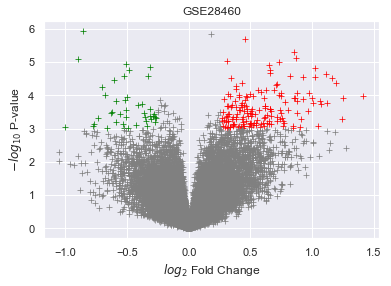

In [2]:
res = pd.read_csv('./28460/res.csv')
plotprocess()

f1 = sns.scatterplot('logFC', 'logPV', marker='+', hue='type', data = res, palette = {'mi':'green', 'pl':'red', 'etc':'gray'}, legend = False)
# f1.vlines (1, 0, 9, colors = 'black')
# f1.vlines (-1, 0, 9, colors = 'black')
# f1.hlines (-(math.log10(0.05)), -20, 20, colors = 'black')
# axes = f1.axes
# f1.set_xlim(-20,20)
# f1.set_ylim(0, 6.5)

plt.title('GSE28460')
plt.xlabel('${log_{2}}$ Fold Change')
plt.ylabel('${-log_{10}}$ P-value')

plt.savefig('./volcano_gse28460.png', dpi=300)

---
## GSE60926

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and wil

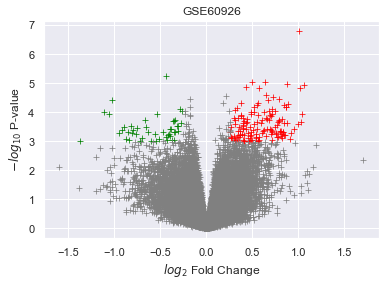

In [3]:
res = pd.read_csv('./60926/res.csv')
plotprocess()

f1 = sns.scatterplot('logFC', 'logPV', marker='+', hue='type', data = res, palette = {'mi':'green', 'pl':'red', 'etc':'gray'}, legend = False)

plt.title('GSE60926')
plt.xlabel('${log_{2}}$ Fold Change')
plt.ylabel('${-log_{10}}$ P-value')

plt.savefig('./volcano_gse60926.png', dpi=300)

---
## TARGET-ALL

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and wil

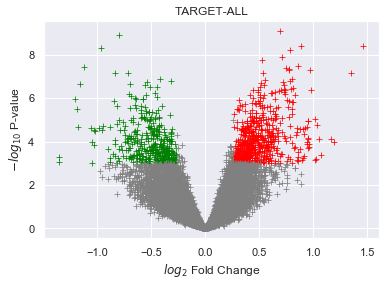

In [4]:
res = pd.read_csv('./cBioPotal/all_phase2_target_2018_pub_(pediatric)/res.csv')
plotprocess()

f1 = sns.scatterplot('logFC', 'logPV', marker='+', hue='type', data = res, palette = {'mi':'green', 'pl':'red', 'etc':'gray'}, legend = False)

plt.title('TARGET-ALL')
plt.xlabel('${log_{2}}$ Fold Change')
plt.ylabel('${-log_{10}}$ P-value')

plt.savefig('./volcano_target.png', dpi=300)